In [44]:
import pandas as pd
import numpy as np
import re
from datetime import date, timedelta

### Données hospitalières

In [6]:
df = pd.read_csv('../data/raw/donnees-hospitalieres-covid19-raw.csv', sep=';')

In [7]:
df.head(30) # Show first 30

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
5,02,2,2020-03-18,22,6,7,5
6,03,0,2020-03-18,4,0,1,0
7,03,1,2020-03-18,1,0,0,0
8,03,2,2020-03-18,3,0,1,0
9,04,0,2020-03-18,3,1,2,0


In [8]:
df.describe()

,sexe,hosp,rea,rad,dc
count,47877.000000,47877.000000,47877.000000,47877.000000,47877.000000
mean,1.000000,95.856424,13.874595,389.056520,103.347724
std,0.816505,209.301454,39.963496,673.886618,189.913632
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,53.000000,11.000000
50%,1.000000,26.000000,2.000000,140.000000,36.000000
75%,2.000000,84.000000,10.000000,385.000000,96.000000
max,2.000000,3281.000000,855.000000,6555.000000,1799.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47877 entries, 0 to 47876
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     47874 non-null  object
 1   sexe    47877 non-null  int64 
 2   jour    47877 non-null  object
 3   hosp    47877 non-null  int64 
 4   rea     47877 non-null  int64 
 5   rad     47877 non-null  int64 
 6   dc      47877 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.6+ MB


In [10]:
# create a filter for all genders
all_gender_filter = df['sexe'] == 0

In [47]:
date_pattern = re.compile("[0-9]{4}-[0-9]{2}-[0-9]{2}")
pattern_matcher_filter = df['jour'].str.match(pat = date_pattern)

In [48]:
# create a filter for yesterday's cases
yesterday = date.today() - timedelta(days = 1)
yesterday_filter = df['jour'] == yesterday.strftime('%Y-%m-%d')
yesterday_df = df.where(yesterday_filter & all_gender_filter & pattern_matcher_filter)

In [49]:
yesterday_df = yesterday_df.dropna() #remove NaN rows

In [50]:
yesterday_df.describe()

,sexe,hosp,rea,rad,dc
count,101.0,101.000000,101.000000,101.000000,101.000000
mean,0.0,46.386139,3.643564,840.821782,197.821782
std,0.0,90.433508,7.172983,1179.678163,303.112962
min,0.0,0.000000,0.000000,24.000000,1.000000
25%,0.0,3.000000,0.000000,159.000000,28.000000
50%,0.0,9.000000,1.000000,378.000000,85.000000
75%,0.0,42.000000,3.000000,847.000000,192.000000
max,0.0,527.000000,46.000000,6555.000000,1799.000000


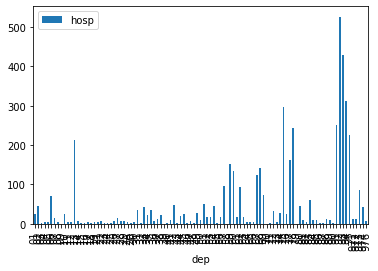

In [51]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'hosp')

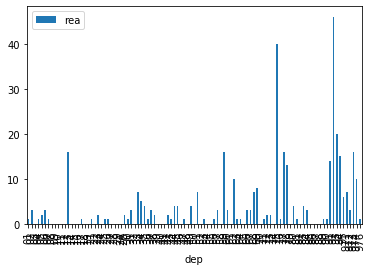

In [52]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rea')

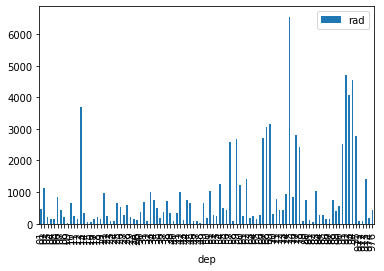

In [53]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rad')

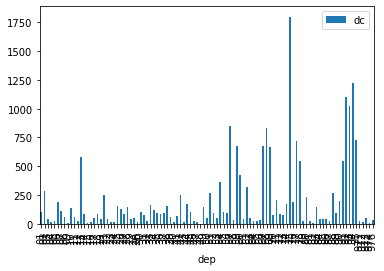

In [54]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'dc')

In [69]:
last_week = date.today() - timedelta(days = 7)
last_week_filter = df['jour'] >= last_week.strftime('%Y-%m-%d')
last_week_df = df.where(last_week_filter & all_gender_filter & pattern_matcher_filter).dropna()
last_week_df = last_week_df.groupby(['jour'])
last_week_df.head()
last_week_df.sum()['hosp']

jour
2020-08-16    4820.0
2020-08-17    4885.0
2020-08-18    4783.0
2020-08-19    4781.0
2020-08-20    4723.0
2020-08-21    4720.0
2020-08-22    4685.0
Name: hosp, dtype: float64

In [82]:
week_title = 'Tendance du ' + last_week.strftime('%d/%m/%Y') + ' au ' + yesterday.strftime('%d/%m/%Y')

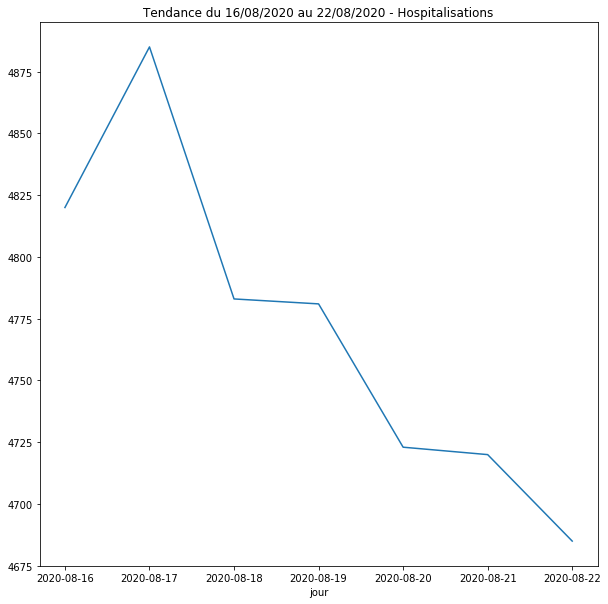

In [90]:
last_week_df.sum()['hosp'].plot(title = week_title + ' - Hospitalisations', figsize= (10,10))

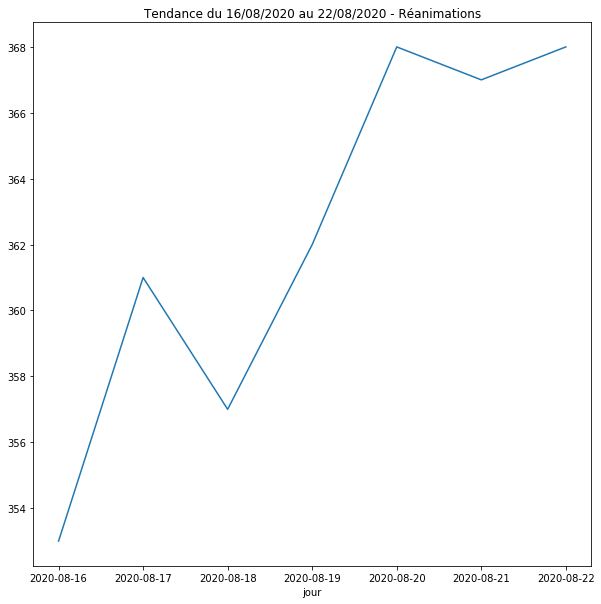

In [91]:
last_week_df.sum()['rea'].plot(title = week_title + ' - Réanimations', figsize= (10,10))

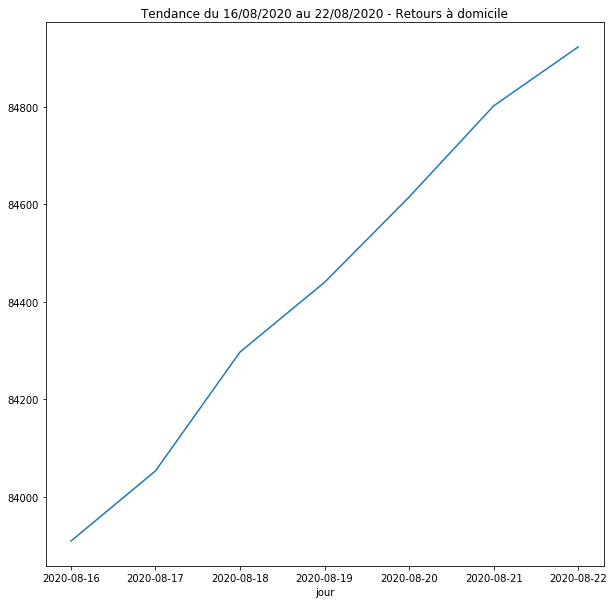

In [92]:
last_week_df.sum()['rad'].plot(title = week_title + ' - Retours à domicile', figsize= (10,10))

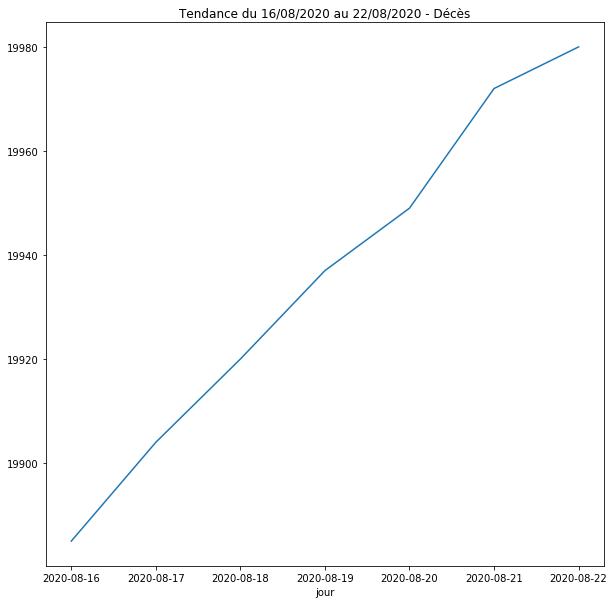

In [93]:
last_week_df.sum()['dc'].plot(title = week_title + ' - Décès', figsize= (10,10))

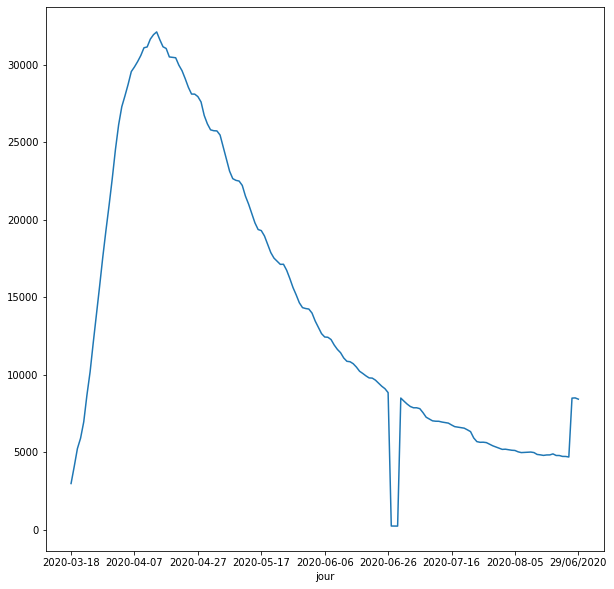

In [97]:
test = df.where(all_gender_filter).groupby('jour').sum()['hosp'].plot(figsize = (10, 10))